In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
df=pd.read_csv('/gdrive/MyDrive/Risk Prediction/Dataset/Mortality_incidence_sociodemographic_and_clinical_data_in_COVID19_patients.csv')
df.head(5)

,Derivation cohort,LOS_Y,LOS,Death,Age,Severity,Black,White,Asian,Latino,...,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
0,1,1,1,0,>80,3,0,0,0,0,...,0,1,0.4999,0,0,0.0,0,1,0.01,0
1,1,1,2,1,>60,7,0,1,0,0,...,1,1,14.9000,1,1,0.6,1,1,1.20,1
2,1,1,2,1,>80,7,0,1,0,0,...,1,1,33.9000,1,1,1.2,1,0,0.00,0
3,1,1,15,0,>70,9,1,0,0,0,...,1,1,18.4000,1,1,7.3,1,1,0.05,0
4,1,1,9,0,>70,7,1,0,0,0,...,1,1,11.6000,1,0,0.0,0,1,0.01,0


In [ ]:
df=df.drop('Age',axis=1)

In [ ]:
df.columns

Index(['Derivation cohort', 'LOS_Y', 'LOS', 'Death', 'Severity', 'Black',
       'White', 'Asian', 'Latino', 'MI', 'PVD', 'CHF', 'CVD', 'DEMENT', 'COPD',
       'DM Complicated', 'DM Simple', 'Renal Disease', 'All CNS', 'Pure CNS',
       'Stroke', 'Seizure', 'OldSyncope', 'OldOtherNeuro', 'OtherBrnLsn',
       'Age.1', 'AgeScore', 'O2SatsYes', 'OsSats', 'O2 Sat < 94', 'TempYes',
       'Temp', 'Temp > 38', 'MapYes', 'MAP', 'MAP < 70', 'DDimerYes', 'Ddimer',
       'D-Dimer > 3', 'PltsYes', 'Plts', 'PltsScore', 'INRYes', 'INR',
       'INR > 1.2', 'BUNYes', 'BUN', 'BUN > 30', 'CrtnYes', 'Creatinine',
       'CrtnScore', 'SodimuYes', 'Sodium', 'Sodium < 139 or > 154',
       'GlucoseYese', 'Glucose', 'Glucose <60 or > 500', 'ASTYes', 'AST',
       'AST > 40', 'ALTYes', 'ALT', 'ALT > 40', 'WBCYes', 'WBC',
       'WBC <1.8 or > 4.8', 'LymphoYes', 'Lympho', 'Lymphocytes < 1', 'IL6Yes',
       'IL6', 'IL6 > 150', 'FerritinYes', 'Ferritin', 'Ferritin > 300',
       'CrctProtYes', 'CrctProtei

In [ ]:
Y=df['Death']

In [ ]:
Y.shape

(4711,)

In [ ]:
X=df.drop('Death',axis=1)

In [ ]:
X.shape

(4711, 83)

In [ ]:
df['Death'].value_counts()

0    3563
1    1148
Name: Death, dtype: int64

In [ ]:
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res,Y_res = sm.fit_resample(X,Y.ravel())

In [ ]:
X_res.shape

(7126, 83)

In [ ]:
Y_res.shape

(7126,)

In [ ]:
Y_res

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
reconstructeddataframe=pd.DataFrame(data=X_res, index=None, columns=None)

In [ ]:
reconstructeddataframe

,Derivation cohort,LOS_Y,LOS,Severity,Black,White,Asian,Latino,MI,PVD,...,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
0,1,1,1,3,0,0,0,0,0,0,...,0,1,0.499900,0,0,0.000000,0,1,0.010000,0
1,1,1,2,7,0,1,0,0,0,1,...,1,1,14.900000,1,1,0.600000,1,1,1.200000,1
2,1,1,2,7,0,1,0,0,0,1,...,1,1,33.900000,1,1,1.200000,1,0,0.000000,0
3,1,1,15,9,1,0,0,0,1,0,...,1,1,18.400000,1,1,7.300000,1,1,0.050000,0
4,1,1,9,7,1,0,0,0,0,0,...,1,1,11.600000,1,0,0.000000,0,1,0.010000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,1,1,4,7,1,0,0,0,0,0,...,1,1,13.732292,0,0,0.000000,0,0,0.040467,0
7122,0,1,19,2,0,0,0,0,0,0,...,1,1,7.740035,0,1,0.200000,1,1,0.022688,0
7123,1,1,9,7,0,0,0,0,0,0,...,1,1,30.669467,1,1,8.903578,1,0,0.099401,0
7124,1,1,10,5,0,0,0,0,0,0,...,0,0,3.940570,0,0,1.504581,0,1,0.010000,0


In [ ]:
reconstructeddataframe['Death']=Y_res

In [ ]:
reconstructeddataframe

,Derivation cohort,LOS_Y,LOS,Severity,Black,White,Asian,Latino,MI,PVD,...,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1,Death
0,1,1,1,3,0,0,0,0,0,0,...,1,0.499900,0,0,0.000000,0,1,0.010000,0,0
1,1,1,2,7,0,1,0,0,0,1,...,1,14.900000,1,1,0.600000,1,1,1.200000,1,1
2,1,1,2,7,0,1,0,0,0,1,...,1,33.900000,1,1,1.200000,1,0,0.000000,0,1
3,1,1,15,9,1,0,0,0,1,0,...,1,18.400000,1,1,7.300000,1,1,0.050000,0,0
4,1,1,9,7,1,0,0,0,0,0,...,1,11.600000,1,0,0.000000,0,1,0.010000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,1,1,4,7,1,0,0,0,0,0,...,1,13.732292,0,0,0.000000,0,0,0.040467,0,1
7122,0,1,19,2,0,0,0,0,0,0,...,1,7.740035,0,1,0.200000,1,1,0.022688,0,1
7123,1,1,9,7,0,0,0,0,0,0,...,1,30.669467,1,1,8.903578,1,0,0.099401,0,1
7124,1,1,10,5,0,0,0,0,0,0,...,0,3.940570,0,0,1.504581,0,1,0.010000,0,1


In [ ]:
reconstructeddataframe['Death'].value_counts()

0    3563
1    3563
Name: Death, dtype: int64

In [ ]:
data=reconstructeddataframe

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

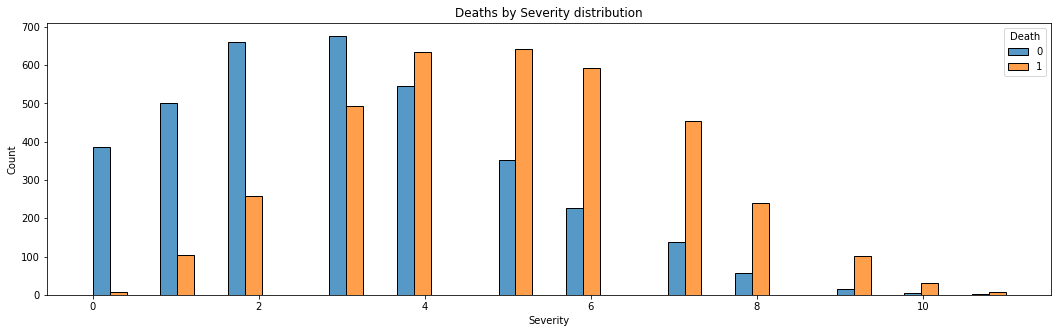

In [ ]:
#Plot distribution by sevetiry class
plt.figure(figsize=(18,5))
plt.title('Deaths by Severity distribution')
sns.histplot(x='Severity', hue='Death', multiple="dodge", data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


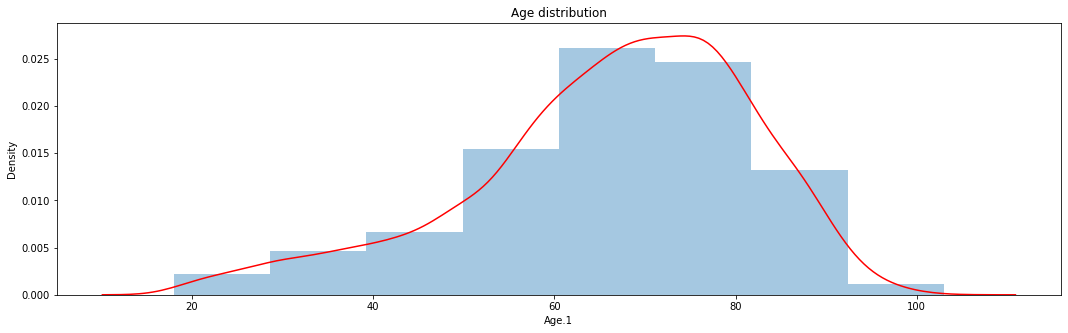

In [ ]:
#Plot distribution of ages
plt.figure(figsize=(18,5))
plt.title('Age distribution')
sns.distplot(a=data['Age.1'], bins=8, kde_kws={"color":"red"})

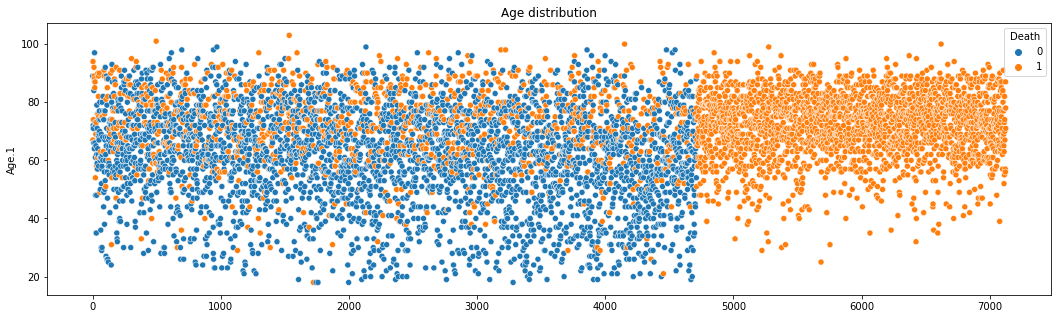

In [ ]:
#Plot scatter with detailed info of age vs survived
plt.figure(figsize=(18,5))
plt.title('Age distribution')
sns.scatterplot(x=data.index, y=data['Age.1'], hue=data.Death)

In [ ]:
print('Percentage of people that survived: ',(data.Death.value_counts(normalize=True)*100)[0])
print('Percentage of people that not survived: ',(data.Death.value_counts(normalize=True)*100)[1])

Percentage of people that survived:  50.0
Percentage of people that not survived:  50.0


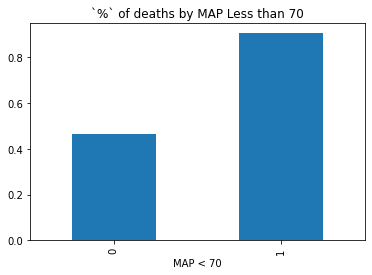

In [ ]:
# Plot the percentage of deaths by Maps Less than 70
grouped = data.groupby('MAP < 70').sum()['Death'] / data.groupby('MAP < 70').count()['Death']
grouped.plot.bar(title = '`%` of deaths by MAP Less than 70')

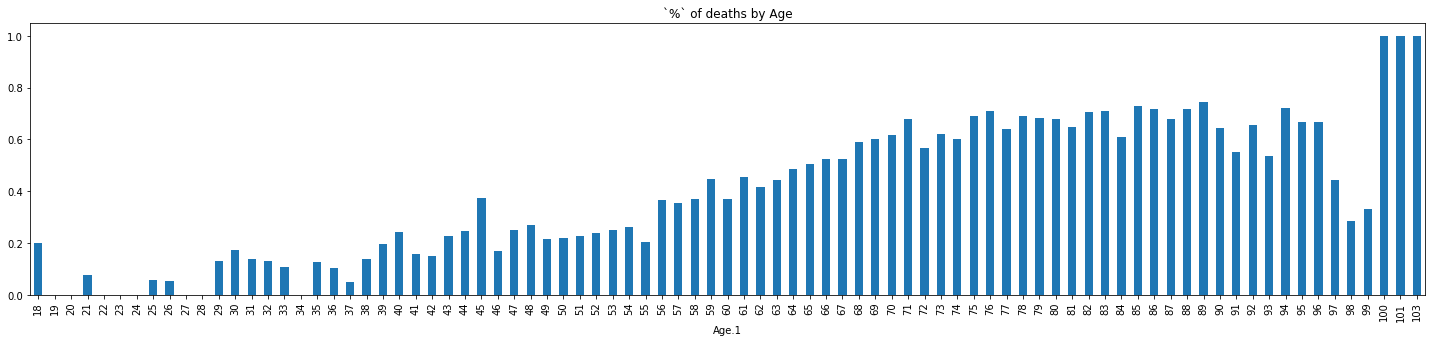

In [ ]:
# Plot the percentage of deaths by Age
groupedAge = data.groupby('Age.1').sum()['Death'] / data.groupby('Age.1').count()['Death']
groupedAge.plot.bar(title = '`%` of deaths by Age', figsize=(25,5))

In [ ]:
#show only column names with more than 2 unique values, discarding all boolean ones. 
cols = ((data.dtypes != 'object') & (data.nunique() > 2))
cols = cols.drop(['LOS', 'Severity', 'Age.1', 'AgeScore','CrtnScore','PltsScore']) #drop items that show categories, scores, etc.
normFeatures = list(cols[cols].index)
print(normFeatures)

['PVD', 'OsSats', 'Temp', 'MAP', 'Ddimer', 'Plts', 'INR', 'BUN', 'Creatinine', 'Sodium', 'Glucose', 'AST', 'ALT', 'WBC', 'Lympho', 'IL6', 'Ferritin', 'CrctProtein', 'Procalcitonin', 'Troponin']


In [ ]:
#Apply StandardScaler() in a couple of columns
from sklearn.preprocessing import StandardScaler


normalizedData = data.copy()

for name in normFeatures:
    normalizedData[name] = (normalizedData[name] - normalizedData[name].mean()) / normalizedData[name].std()

normalizedData[normFeatures]

,PVD,OsSats,Temp,MAP,Ddimer,Plts,INR,BUN,Creatinine,Sodium,Glucose,AST,ALT,WBC,Lympho,IL6,Ferritin,CrctProtein,Procalcitonin,Troponin
0,-0.372374,0.340174,0.122476,1.003645,-0.575711,-0.150451,-0.044614,-0.441545,-0.545463,0.082171,-0.132274,-0.204496,-0.258455,-0.458276,0.030199,-0.072980,-0.352520,-0.961308,-0.312628,-0.175698
1,2.471715,-0.003342,0.044393,0.318458,-0.165868,0.302393,0.276173,5.352679,2.660654,0.150905,1.052694,0.074412,-0.111098,0.509273,-0.233037,-0.072980,-0.092649,0.291863,-0.223443,3.692703
2,2.471715,0.569185,0.447356,-0.448936,-0.180571,-0.778886,-0.151543,1.662674,0.495582,0.254005,-0.062570,-0.176133,-0.225709,-0.384977,-0.185176,0.062624,-0.167821,1.945341,-0.134259,-0.208205
3,-0.372374,-0.175100,0.401343,1.003645,-0.136462,0.015900,0.169244,-0.929479,2.321183,-0.020930,-0.999702,-0.119406,-0.233896,-0.736812,-0.185176,-0.072980,-0.112910,0.596451,0.772450,-0.045667
4,-0.372374,0.225669,0.285613,1.071877,-0.388249,-0.889787,-0.151543,-0.929479,0.171198,0.563306,-0.999702,-0.147769,-0.143844,-0.443616,0.030199,-0.056495,0.144024,0.004680,-0.312628,-0.175698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,-0.372374,0.111163,0.415436,-0.427962,-0.188764,-1.388839,0.306740,0.914794,2.718570,0.126362,-0.367576,-0.176133,-0.278728,-0.524580,-0.081468,-0.072980,0.463520,0.190243,-0.312628,-0.076655
7122,-0.372374,0.454679,0.292285,-0.701002,-0.176882,0.006658,-0.044614,-0.929479,-0.157126,0.103973,-0.999702,-0.204496,-0.271835,-0.141903,-0.028728,-0.058804,-0.122118,-0.331234,-0.282900,-0.134453
7123,-0.372374,0.569185,0.447356,-0.539502,-0.404360,-0.778886,1.619931,1.561629,0.773656,0.111668,0.020830,-0.195042,-0.279959,-0.469980,-0.224821,0.023530,-0.139849,1.664204,1.010807,0.114923
7124,-0.372374,0.225669,0.318007,-1.048289,-0.691496,-0.677228,0.158167,-0.271306,-0.481559,0.169868,0.552866,-0.199769,-0.259553,0.012182,-0.178391,-0.072980,-0.352520,-0.661883,-0.088986,-0.175698


In [ ]:
#Retrieve the data with the original name
data = normalizedData

In [ ]:
#Group (cut) severity by classes - Apply Binning
labels = [0,1,2,3]
data['Severity_class'] = pd.cut(data['Severity'], bins=4, labels=labels, right=False)
data.head()

,Derivation cohort,LOS_Y,LOS,Severity,Black,White,Asian,Latino,MI,PVD,...,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1,Death,Severity_class
0,1,1,1,3,0,0,0,0,0,-0.372374,...,-0.961308,0,0,-0.312628,0,1,-0.175698,0,0,1
1,1,1,2,7,0,1,0,0,0,2.471715,...,0.291863,1,1,-0.223443,1,1,3.692703,1,1,2
2,1,1,2,7,0,1,0,0,0,2.471715,...,1.945341,1,1,-0.134259,1,0,-0.208205,0,1,2
3,1,1,15,9,1,0,0,0,1,-0.372374,...,0.596451,1,1,0.772450,1,1,-0.045667,0,0,3
4,1,1,9,7,1,0,0,0,0,-0.372374,...,0.004680,1,0,-0.312628,0,1,-0.175698,0,0,2


In [ ]:
data['Severity_class'] = data['Severity_class'].astype('int64')
data['Severity_class'][:5]

0    1
1    2
2    2
3    3
4    2
Name: Severity_class, dtype: int64

In [ ]:
# Calculate the correlation between variables and Deaths
correlation_order = data.corr()[['Death']].sort_values(by=['Death'], ascending = False).drop(['Death'])
correlation_order.head(54)

,Death
Severity,0.440227
Severity_class,0.412638
Age.1,0.367720
AgeScore,0.248226
MAP < 70,0.232256
CrctProtein,0.226814
LOS_Y,0.211325
BUN,0.205629
Ddimer,0.195570
Procalcitonin,0.167863


In [ ]:
data.shape

(7126, 85)

In [ ]:
data.to_csv('/gdrive/MyDrive/Risk Prediction/Dataset/SMOTEdata.csv')

In [ ]:
req_features=['Derivation cohort', 'LOS_Y', 'LOS', 'Severity', 'White', 'COPD', 'Renal Disease',
       'All CNS', 'Pure CNS', 'Stroke', 'Age.1', 'AgeScore', 'O2SatsYes', 'O2 Sat < 94', 'TempYes', 'Temp > 38', 'MAP < 70', 'Ddimer', 'D-Dimer > 3', 'PltsYes', 'PltsScore', 'INRYes', 'INR', 'INR > 1.2', 'BUN',
       'BUN > 30', 'CrtnYes', 'Creatinine', 'CrtnScore', 'Sodium',
       'Sodium < 139 or > 154', 'ASTYes', 'AST', 'AST > 40', 'ALTYes', 'ALT', 'WBCYes', 'WBC', 'WBC <1.8 or > 4.8', 'LymphoYes',
       'Lymphocytes < 1', 'IL6', 'IL6 > 150',
       'Ferritin', 'Ferritin > 300', 'CrctProtein',
       'C-Reactive Prot > 10', 'ProCalCYes', 'Procalcitonin',
       'Procalciton > 0.1', 'TropYes', 'Troponin', 'Troponin > 0.1','Death']

In [ ]:
Balanced_data=data[req_features]

In [ ]:
Balanced_data.shape

(7126, 54)